In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

df1=pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")
df2=pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv")

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [7]:
df1

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
df2

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
df1.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [10]:
df2.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [11]:
df1["im getting on borderlands and i will murder you all ,"]=df1["im getting on borderlands and i will murder you all ,"].fillna("Unknown")

In [12]:
df1.isnull().sum()

2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

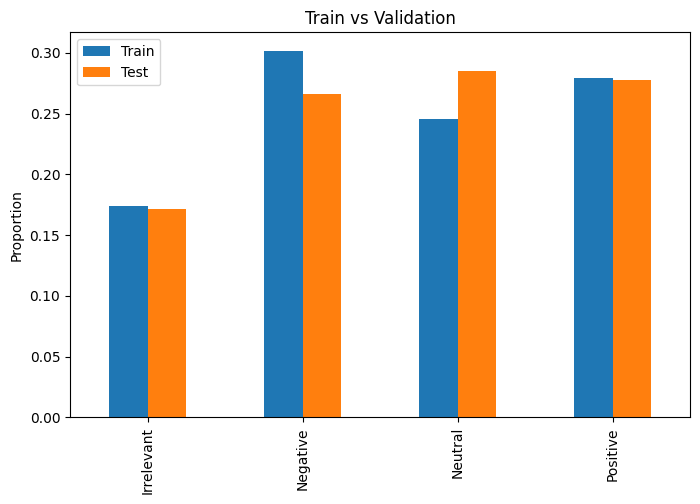

In [13]:
import matplotlib.pyplot as plt
# Compare Pclass distribution
train_pclass = df1['Positive'].value_counts(normalize=True)
test_pclass = df2['Irrelevant'].value_counts(normalize=True)

bar_data = pd.DataFrame({'Train': train_pclass, 'Test': test_pclass})
bar_data.plot(kind='bar', figsize=(8, 5))
plt.title('Train vs Validation')
plt.ylabel('Proportion')
plt.show()

array([[<Axes: title={'center': '2401'}>]], dtype=object)

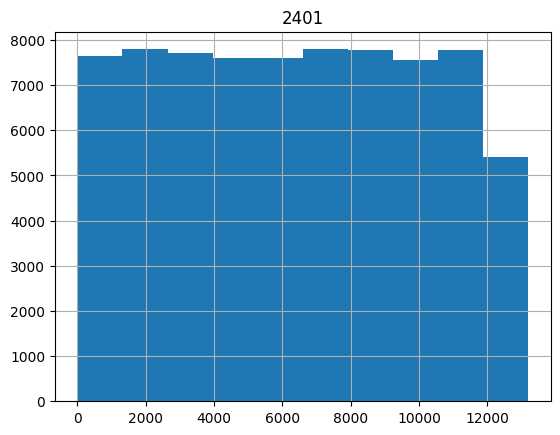

In [14]:
df1.hist()

array([[<Axes: title={'center': '3364'}>]], dtype=object)

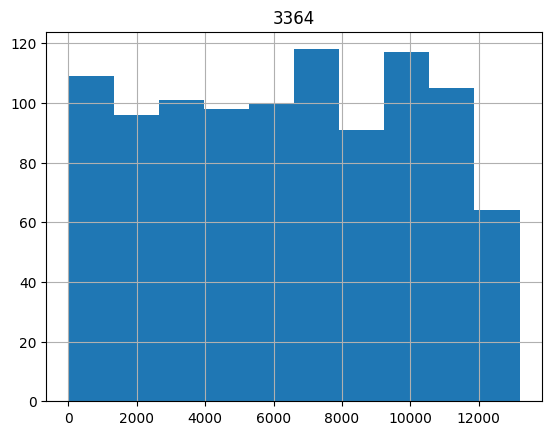

In [15]:
df2.hist()

In [16]:
df2['Irrelevant'].value_counts(normalize=True)

Irrelevant
Neutral       0.285285
Positive      0.277277
Negative      0.266266
Irrelevant    0.171171
Name: proportion, dtype: float64

In [17]:
c=0
for i in range(0,len(df2['Irrelevant'])):
    if(df2['Irrelevant'][i]=='Neutral'):
        c=c+1
print(c)

285


In [18]:
c=0
for i in range(0,len(df2['Irrelevant'])):
    if(df2['Irrelevant'][i]=='Positive'):
        c=c+1
print(c)

277


In [19]:
c=0
for i in range(0,len(df2['Irrelevant'])):
    if(df2['Irrelevant'][i]=='Negative'):
        c=c+1
print(c)

266


In [20]:
c=0
for i in range(0,len(df2['Irrelevant'])):
    if(df2['Irrelevant'][i]=='Irrelevant'):
        c=c+1
print(c)

171


In [21]:
df1['Positive'].value_counts(normalize=True)

Positive
Negative      0.301844
Positive      0.278933
Neutral       0.245283
Irrelevant    0.173940
Name: proportion, dtype: float64

In [22]:
c=0
for i in range(0,len(df1['Positive'])):
    if(df1['Positive'][i]=='Positive'):
        c=c+1
print(c)

20831


In [23]:
c=0
for i in range(0,len(df1['Positive'])):
    if(df1['Positive'][i]=='Negative'):
        c=c+1
print(c)

22542


In [24]:
c=0
for i in range(0,len(df1['Positive'])):
    if(df1['Positive'][i]=='Irrelevant'):
        c=c+1
print(c)

12990


In [25]:
c=0
for i in range(0,len(df1['Positive'])):
    if(df1['Positive'][i]=='Netural'):
        c=c+1
print(c)

0


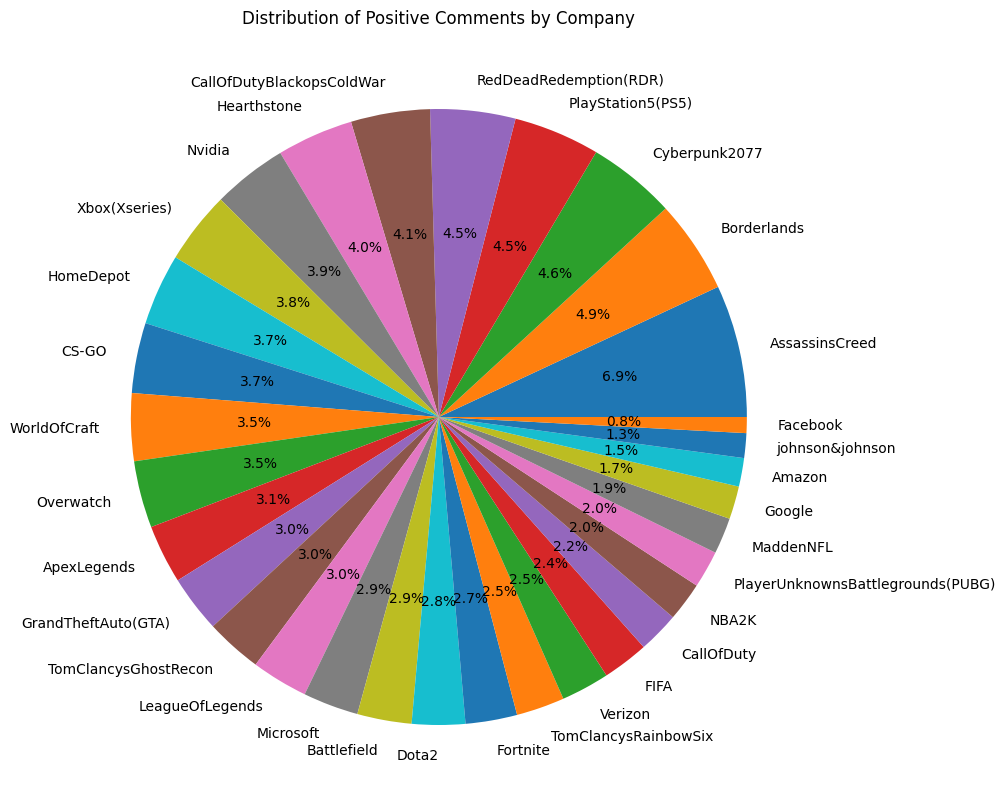

In [26]:




# Rename columns for better understanding
df1.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

# Filter data for "Positive" sentiment
positive_counts = df1[df1['Sentiment'] == 'Positive']['Topic'].value_counts()

# Plot a pie chart for the distribution of Positive comments across companies
plt.figure(figsize=(10, 10))
positive_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360, legend=False)
plt.title('Distribution of Positive Comments by Company')
plt.ylabel('')  # Remove y-axis label for better visualization
plt.show()


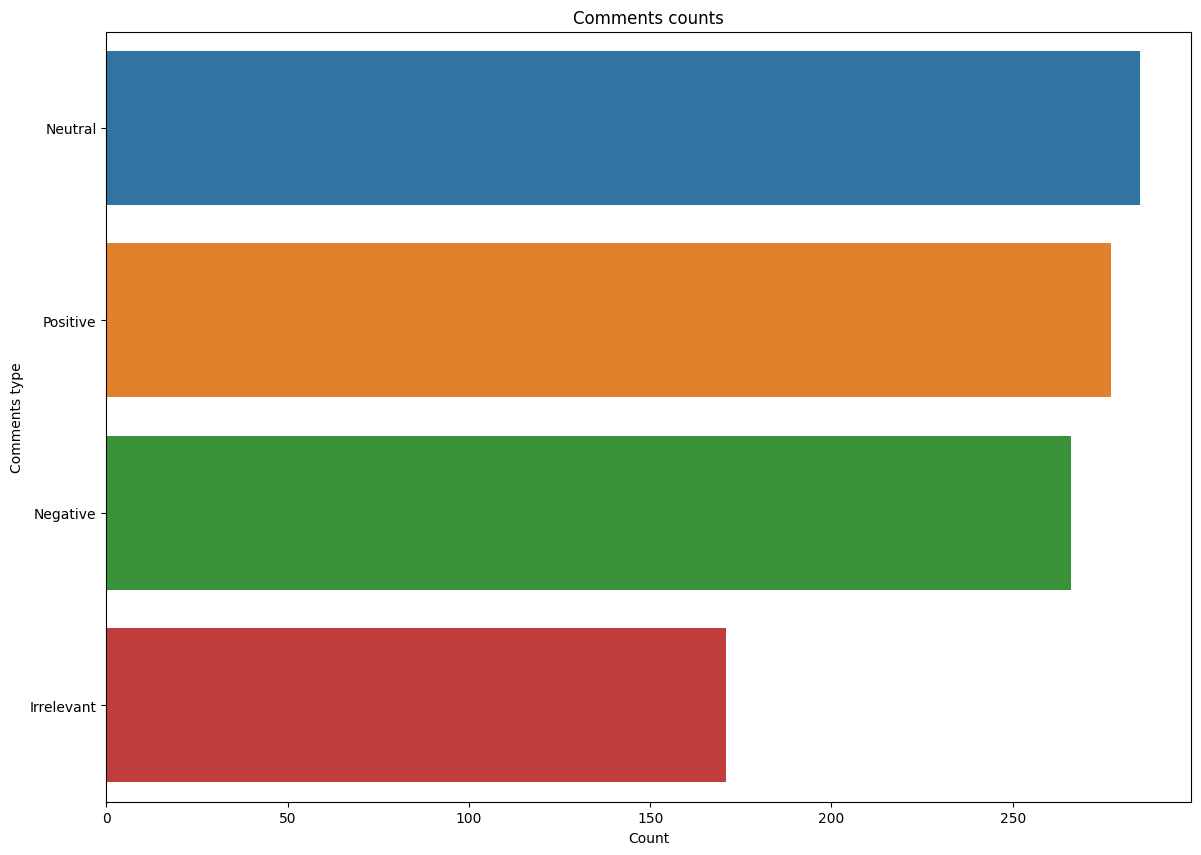

In [34]:
game=df2['Irrelevant'].value_counts()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,10))

sns.barplot(x=game.values,y=game.index)
plt.title('Comments counts')
plt.ylabel('Comments type')
plt.xlabel('Count')

plt.show()